In [ ]:
%pip install insightface

In [28]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [ ]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

In [67]:
img = np.array(Image.open('image.jpeg'))
faces = app.get(img)

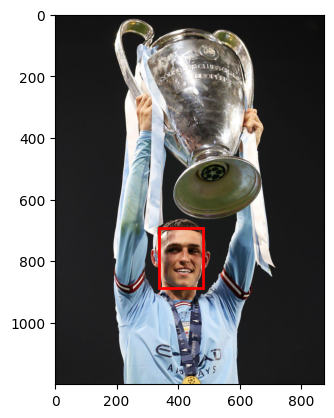

In [72]:
plt.imshow(img)

bbox = faces[0]['bbox']

# Create a Rectangle patch with the bounding box coordinates
rect = Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                 linewidth=2, edgecolor='r', facecolor='none')

# Add the Rectangle patch to the current plot
plt.gca().add_patch(rect)

# Show the plot with the bounding box
plt.show()

In [40]:
!gdown 1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF

Downloading...
From: https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
To: /content/inswapper_128.onnx
100% 554M/554M [00:09<00:00, 59.1MB/s]


In [ ]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)

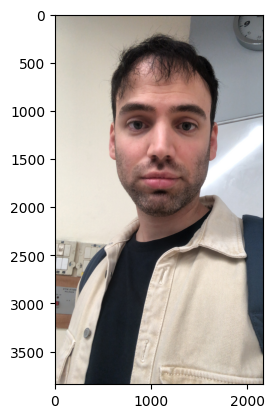

In [76]:
itay_img = Image.open('itay.jpg')
itay_face = app.get(np.array(itay_img))[0]
plt.imshow(itay_img.rotate(-90, expand=True))


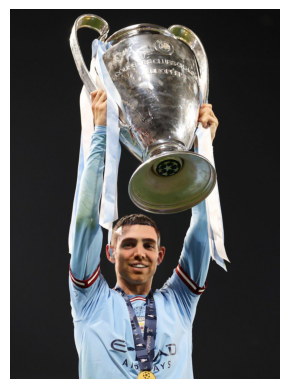

In [70]:
res = img.copy()

for face in faces:
    res = swapper.get(res, face, itay_face, paste_back=True)

fig, ax = plt.subplots()
ax.imshow(res)
ax.axis('off')
plt.show()

In [71]:
Image.fromarray(res).save('result_image.jpg')